In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)

mouse_drug_data_to_load = os.path.join("data", "mouse_drug_data.csv")
clinical_trial_data_to_load = os.path.join("data", "clinicaltrial_data.csv")

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)                                           

# Combine the data into a single dataset
data = pd.merge(clinical_trial_data, mouse_drug_data,\
                on="Mouse ID",\
                how="left")

# Display the data table for preview
data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_vol_mean = data.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]
                        
tumor_vol_mean_df = pd.DataFrame(tumor_vol_mean).reset_index()\
                        .rename(columns={"Tumor Volume (mm3)":"Tumor Vol (mm3) - Mean"})
tumor_vol_mean_df

,Drug,Timepoint,Tumor Vol (mm3) - Mean
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_vol_error = data.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]
                           
tumor_vol_error_df = pd.DataFrame(tumor_vol_error).reset_index()\
                            .rename(columns={"Tumor Volume (mm3)":"Tumor Vol (mm3) - Standar Error"})
tumor_vol_error_df

,Drug,Timepoint,Tumor Vol (mm3) - Standar Error
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [4]:
# Minor Data Munging to Re-Format the Data Frames
tumor_vol_mean_pivot = tumor_vol_mean_df.pivot(index="Timepoint", 
                                               columns="Drug", 
                                               values="Tumor Vol (mm3) - Mean")
tumor_vol_mean_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [5]:
tumor_vol_error_pivot = tumor_vol_error_df.pivot(index="Timepoint", 
                                                 columns="Drug", 
                                                 values="Tumor Vol (mm3) - Standar Error")
tumor_vol_error_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


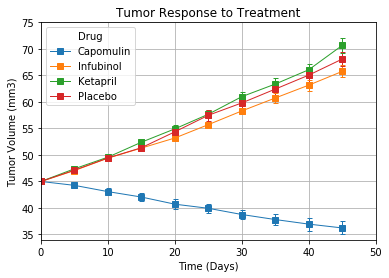

In [6]:
# Creating the df for 4 treatments to be analyzed
tumor_vol_study_mean_df = tumor_vol_mean_pivot[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
tumor_study_error_df = tumor_vol_error_pivot[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]

# Generate the Plot (with Error Bars)
tumor_vol_study_mean_df.plot(
                             title="Tumor Response to Treatment",
                             kind="line", 
                             use_index=True,
                             yerr=tumor_study_error_df,
                             capsize=2.5,
                             grid=True, 
                             xlim=(0,50),
                             ylim=(34,75),
                             marker="s",
                             linewidth=1)
    
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.savefig("plots/Tumor_Response_Treatment.png")
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_response_mean = pd.DataFrame(data.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"])\
                                .reset_index()\
                                .rename(columns={"Metastatic Sites":"Metastatic Sites - Mean"})
metastatic_response_mean

,Drug,Timepoint,Metastatic Sites - Mean
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_response_error = pd.DataFrame(data.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"])\
                            .reset_index()\
                            .rename(columns={"Metastatic Sites":"Metastatic Sites - Error"})
metastatic_response_error

,Drug,Timepoint,Metastatic Sites - Error
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
...,...,...,...
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791


In [9]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_mean_pivot = metastatic_response_mean.pivot(index="Timepoint", 
                                                       columns="Drug", 
                                                       values="Metastatic Sites - Mean")
metastatic_mean_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [10]:
metastatic_error_pivot = metastatic_response_error.pivot(index="Timepoint", 
                                                         columns="Drug", 
                                                         values="Metastatic Sites - Error")
metastatic_error_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


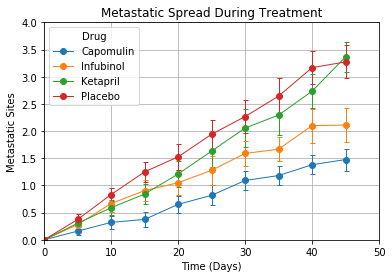

In [11]:
# Creating the df for 4 treatments to be analyzed
metastatic_study_mean_df = metastatic_mean_pivot[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
metastatic_study_error_df = metastatic_error_pivot[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]

# Generate the Plot (with Error Bars)
metastatic_study_mean_df.plot(
                             title="Metastatic Spread During Treatment",
                             kind="line", 
                             use_index=True,
                             yerr=metastatic_study_error_df,
                             capsize=2.5,
                             grid=True, 
                             xlim=(0,50),
                             ylim=(0,4.0),
                             marker="o",
                             linewidth=1)
    
plt.xlabel("Time (Days)")
plt.ylabel("Metastatic Sites")
plt.savefig("plots/Metastatic Spread During Treatment.png")
plt.show()

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = pd.DataFrame(data.groupby(["Drug", "Timepoint"]).count()["Mouse ID"])\
                        .reset_index()\
                        .rename(columns={"Mouse ID":"Mouse Count"})
mice_count

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [13]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count_pivot = mice_count.pivot(index="Timepoint", 
                                     columns="Drug", 
                                     values="Mouse Count")
mouse_count_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [14]:
# Creating the df for 4 treatments to be analyzed

study_survival_df = mouse_count_pivot[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]

#Check the inicial count of rats

total_survival =study_survival_df.loc[0,:]

#For loop to calculate the percentages at different time points for each 4 treatment

for column in study_survival_df:
    study_survival_df[column] = (study_survival_df[column] / total_survival.loc[column])*100

study_survival_df 

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0
25,88.0,72.0,76.0,68.0
30,88.0,68.0,72.0,60.0
35,88.0,48.0,68.0,56.0
40,84.0,40.0,60.0,48.0


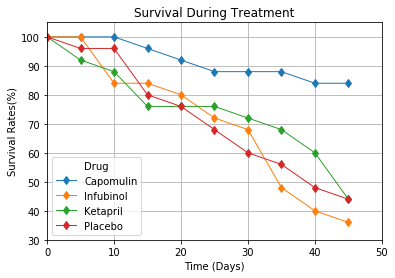

In [15]:
#plot
study_survival_df.plot(                            
                        title="Survival During Treatment",
                        kind="line",
                        use_index=True,
                        xlim=(0,50),
                        ylim=(30,105),
                        grid=True,
                        marker="d",
                        linewidth=1)

plt.xlabel("Time (Days)")
plt.ylabel("Survival Rates(%)")

plt.savefig("plots/Survival_Rates.png")
plt.show()
   

## Summary Bar Graph

In [16]:
# Calculate the percent changes for each drug
#series
percentage_vol_change = (tumor_vol_study_mean_df.loc[45,:]\
                                - tumor_vol_study_mean_df.loc[0,:])\
                                /tumor_vol_study_mean_df.loc[0,:]*100
#df                     
percentage_vol_change_df = pd.DataFrame({'Percent Change': percentage_vol_change[\
                                                        ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]})


In [17]:
#Check passing drugs (any drug that the tumor shrank)
#series
passing = percentage_vol_change_df["Percent Change"] < 0
#df
passing_df = pd.DataFrame(passing).rename(columns={"Percent Change":"Passing"})


In [18]:
# data frame for plot
study_percent_change_df = pd.merge(percentage_vol_change_df, passing_df,
                                   left_index=True,
                                   right_index=True )
study_percent_change_df

,Percent Change,Passing
Drug,,
Capomulin,-19.475303,True
Infubinol,46.123472,False
Ketapril,57.028795,False
Placebo,51.297960,False


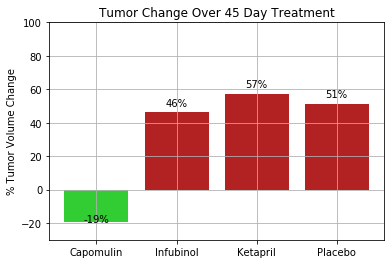

In [19]:
# drug list and % list 
x = study_percent_change_df.index.values
y = study_percent_change_df["Percent Change"].values

fig, ax = plt.subplots()
summary = ax.bar(x, y, color=study_percent_change_df["Passing"]\
                 .map({True:"limegreen",False:"firebrick"}))

#format

ax.grid()
ax.set_ylim(-30,100)
ax.set_title("Tumor Change Over 45 Day Treatment")
ax.set_ylabel("% Tumor Volume Change")

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height) + '%',
                ha='center', va='bottom')


# Call functions to implement the function calls
autolabel(summary)  

# Save the Figure
plt.savefig("plots/Summary_Percent_Tumor_Change.png")

# Show the Figure
plt.show(summary)